# HW Unsupervised Supervised Learning 

### Agi Rahmawandi <br> Batch 57

## Airline Customer Value Analysis Case

### Dataset ini berisi data customer sebuah perusahaan penerbangan dan beberapa fitur yang dapat menggambarkan value dari customer tersebut


https://www.kaggle.com/code/mustiadizaki/airline-customer-value-analysis-case

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn
import xgboost
import sys
print("Versi Pandas:", pd.__version__)
print("Versi NumPy:", np.__version__)
print("Versi Matplotlib:",sns.__version__)
print("Versi Scikit-learn:", sklearn.__version__)
print("Versi xgbosot:", xgboost.__version__)
print("Versi Python yang terinstal adalah:", sys.version)



Versi Pandas: 2.2.3
Versi NumPy: 2.2.5
Versi Matplotlib: 0.13.2
Versi Scikit-learn: 1.6.1
Versi xgbosot: 3.0.1
Versi Python yang terinstal adalah: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]


In [4]:
df = pd.read_csv('dataset/flight.csv')

In [5]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [7]:
df_1 = df.copy()
df_1["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_1["FIRST_FLIGHT_DATE"], errors="coerce")
df_1["LAST_FLIGHT_DATE"] = pd.to_datetime(df_1["LAST_FLIGHT_DATE"], errors="coerce")
df_1["LOAD_TIME"] = pd.to_datetime(df_1["LOAD_TIME"], errors="coerce")

In [8]:
df_1["total_revenue"] = df_1[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)

### 1 .Berapa banyak customer yang melakukan penerbangan dalam setahun terkahir

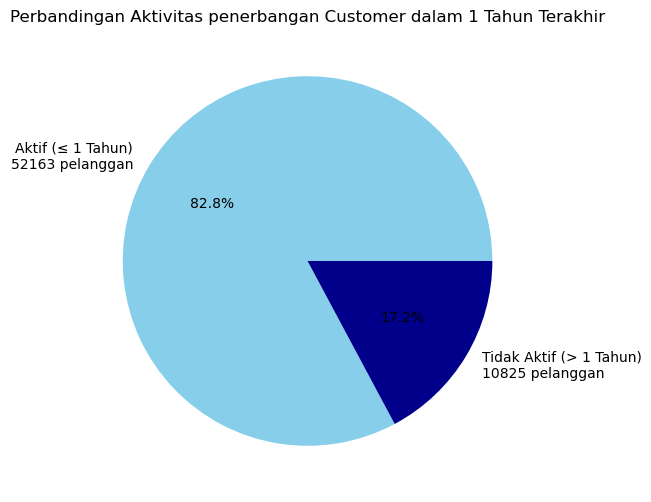

np.int64(52163)

In [9]:
# Hitung jumlah customer per kategori
aktif_count = (df_1['LAST_TO_END'] <= 365).sum()
tidak_aktif_count = (df_1['LAST_TO_END']  > 365).sum()

# Data untuk pie chart
counts = [aktif_count, tidak_aktif_count]
labels = [
    f"Aktif (≤ 1 Tahun)\n{aktif_count} pelanggan",
    f"Tidak Aktif (> 1 Tahun)\n{tidak_aktif_count} pelanggan"
]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["skyblue", "darkblue"])
plt.title("Perbandingan Aktivitas penerbangan Customer dalam 1 Tahun Terakhir")
plt.show()
aktif_count

### 2.Customer dengan Tier/peringkat apa yang sering melakukan penerbangan ?

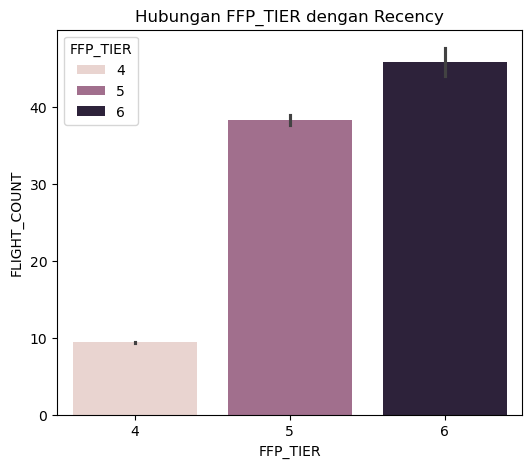

In [ ]:

plt.figure(figsize=(6,5))
sns.barplot(data=df_1, x="FFP_TIER", y="FLIGHT_COUNT", hue='FFP_TIER')
plt.title("Hubungan FFP_TIER dengan jumlah penerbangan")
plt.show()

### 3. Apakah setiap tahun mengalami penigkatan jumlah penerbangan ?

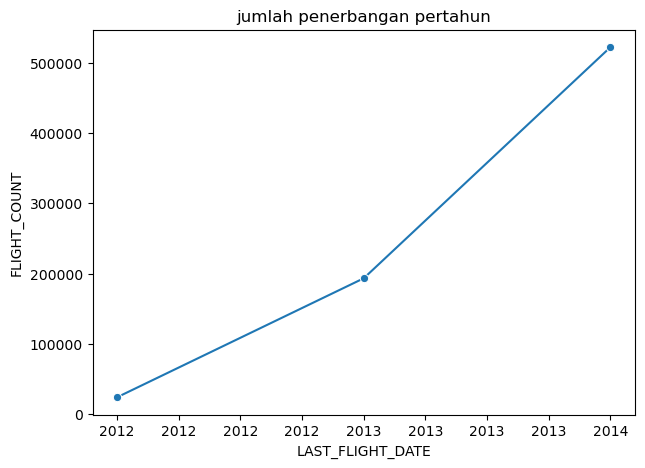

In [11]:

freq_trend = df_1.groupby(df_1["LAST_FLIGHT_DATE"].dt.year)["FLIGHT_COUNT"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=freq_trend, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", marker="o")
plt.title("jumlah penerbangan pertahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 4. Berapa jumlah penerbangan jika dilihat dari Tiernya ? 

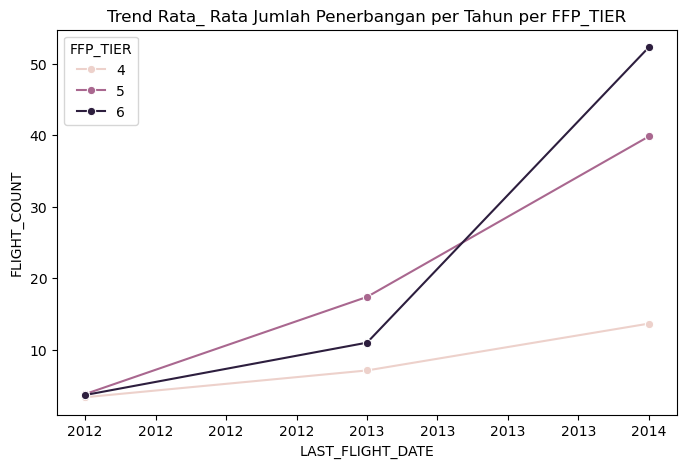

,LAST_FLIGHT_DATE,FFP_TIER,FLIGHT_COUNT
0,2012.0,4,3.356203
1,2012.0,5,3.800000
2,2012.0,6,3.666667
3,2013.0,4,7.100379
4,2013.0,5,17.380282
5,2013.0,6,10.985849
6,2014.0,4,13.649837
7,2014.0,5,39.819803
8,2014.0,6,52.290196


In [12]:
flights_tier_year = df_1.groupby([(df_1["LAST_FLIGHT_DATE"].dt.year),"FFP_TIER"])["FLIGHT_COUNT"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=flights_tier_year, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", hue="FFP_TIER", marker="o")
plt.title("Trend Rata_ Rata Jumlah Penerbangan per Tahun per FFP_TIER")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()
flights_tier_year

### 4.Berapa nilai rata - rata  pedapatan pada setiap Tiernya? 

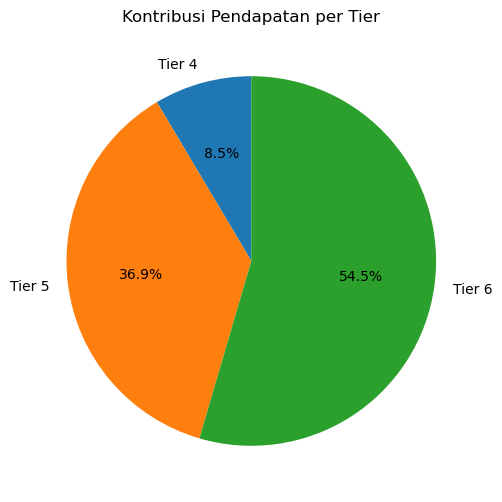

In [13]:
revenue_by_tier = df_1.groupby("FFP_TIER")["total_revenue"].mean().reset_index()

# Visualisasi pie chart semua tier
plt.figure(figsize=(6,6))
plt.pie(revenue_by_tier["total_revenue"],
        labels=[f"Tier {tier}" for tier in revenue_by_tier["FFP_TIER"]],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Kontribusi Pendapatan per Tier")
plt.show()

## 5,Bagaiaman pendapatan pertahunnya apakah mengalami kenaikan ?

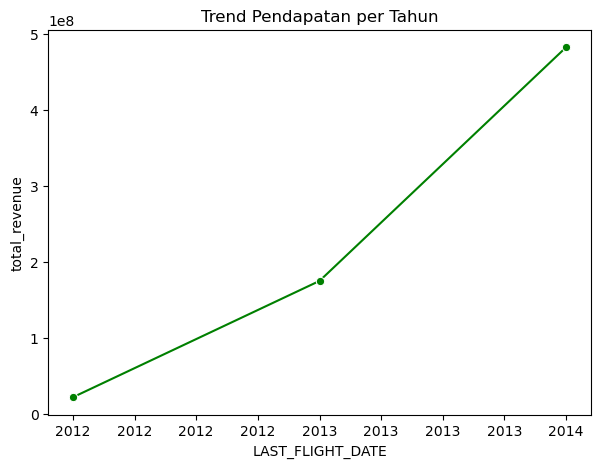

In [14]:
revenue_by_year = df_1.groupby((df_1["LAST_FLIGHT_DATE"].dt.year))["total_revenue"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=revenue_by_year, x="LAST_FLIGHT_DATE", y="total_revenue", marker="o", color="green")
plt.title("Trend Pendapatan per Tahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 6. Tier/peringkat apa yang paling banyak diperoleh oleh customer ?

FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64

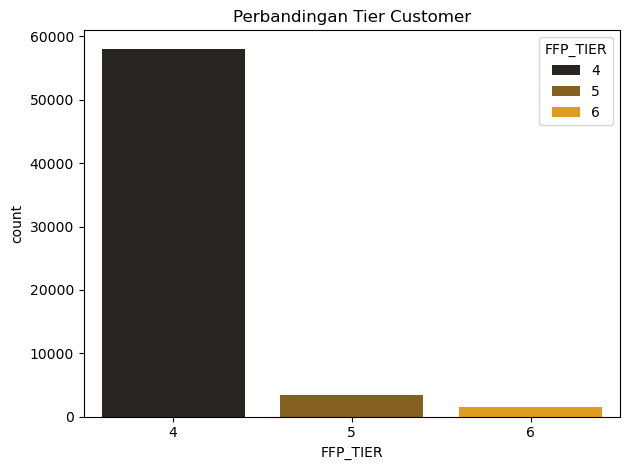

In [15]:
sns.countplot(data=df_1, x='FFP_TIER', hue='FFP_TIER', palette='dark:orange')
plt.title('Perbandingan Tier Customer')
plt.tight_layout()
df['FFP_TIER'].value_counts()

### Deskriftif statistic

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [17]:
df.describe(include='object').T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [129]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
MEMBER_NO                    0         0.000000
LAST_FLIGHT_DATE             0         0.000000
Points_Sum                   0         0.000000
avg_discount                 0         0.000000
EXCHANGE_COUNT               0         0.000000
MAX_INTERVAL                 0         0.000000
AVG_INTERVAL                 0         0.000000
LAST_TO_END                  0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
FFP_DATE                     0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0

### Univaiate analisis 


In [18]:
num_col= df.select_dtypes(include=['int64','float64']).columns
obj_col = df.select_dtypes(include=['object']).columns

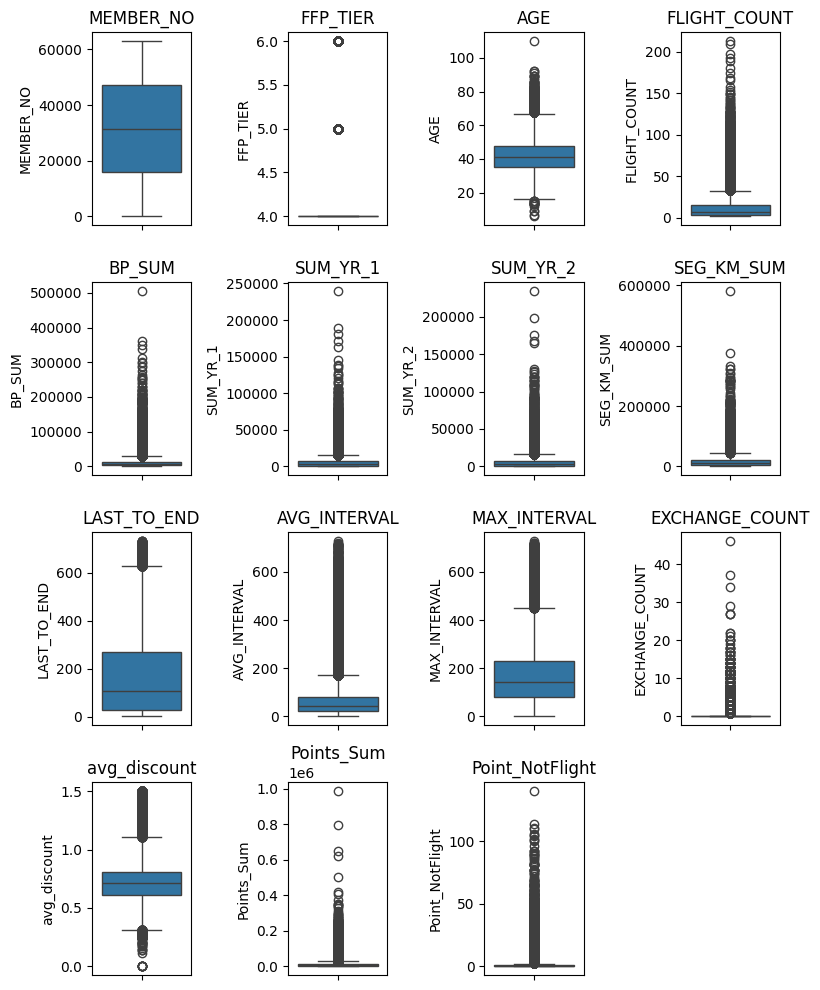

In [131]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_col)/4)), ncols=4, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

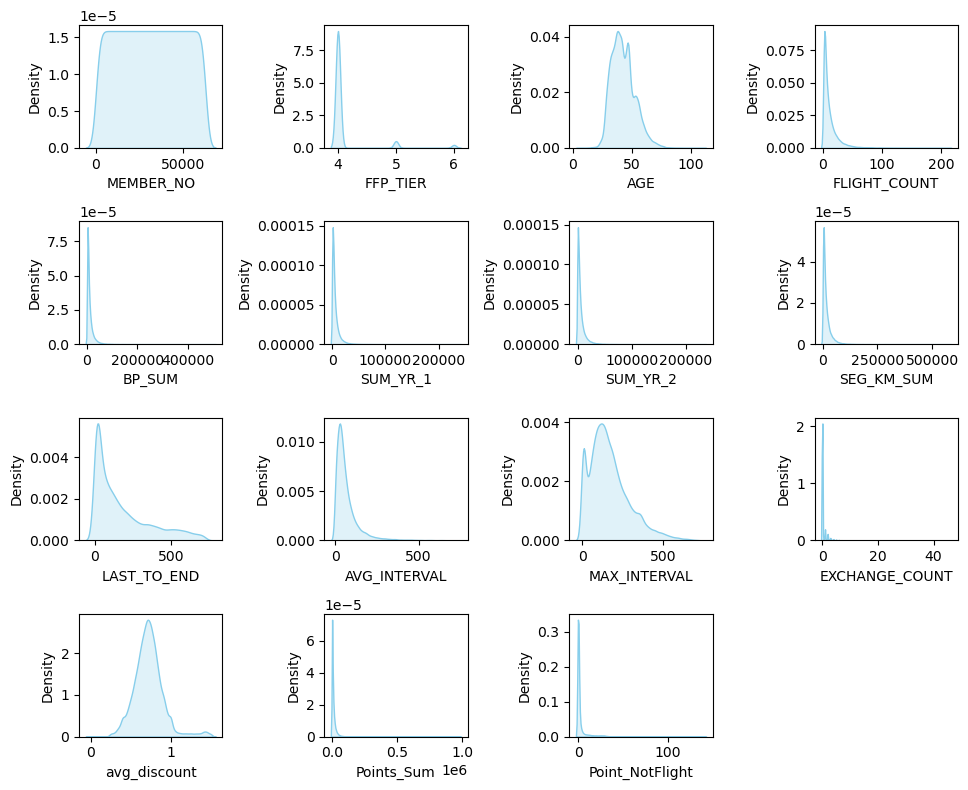

In [19]:
fig, axes = plt.subplots( nrows=int(np.ceil(len(num_col)/4)),ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

rata rata data kolom memiliki outlier

###  Multivariate Analysis

<Axes: >

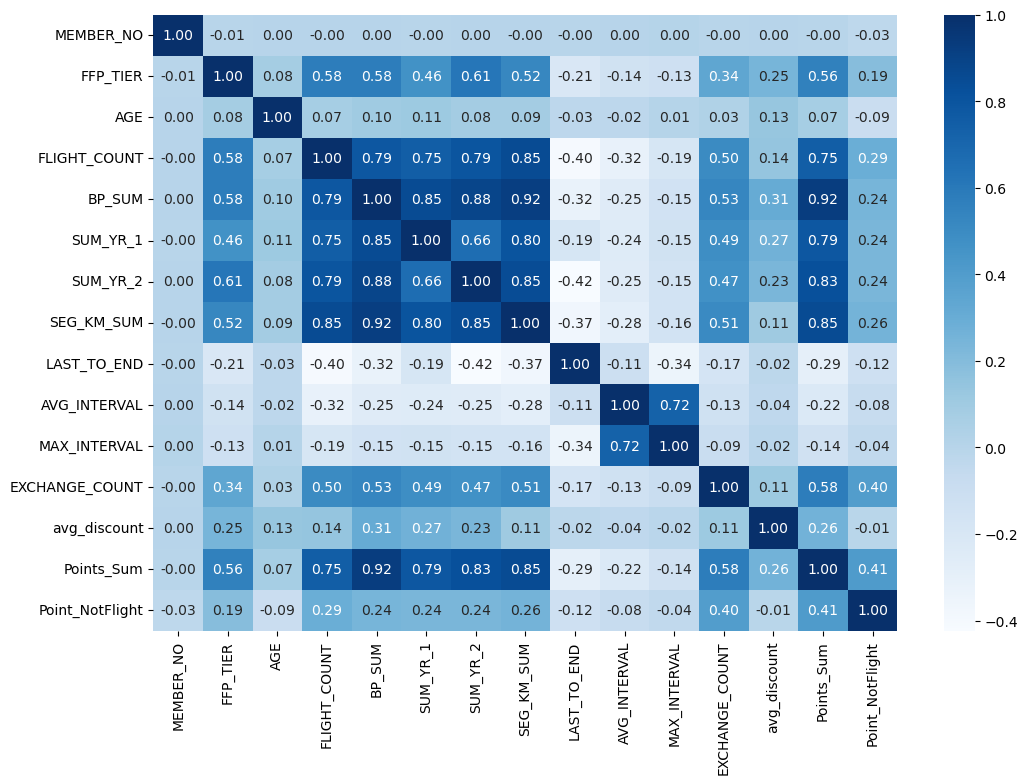

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

terdapat data yang redundan yakni <b>FLIGHT_COUNT,BP_SUM, SUM_YR_1,SUM_YR_2,SEG_KM_SUM , dan Points_Sum</b>

## Preprocessing 

### Handling missing value

In [22]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
FFP_TIER                     0         0.000000
MEMBER_NO                    0         0.000000
FFP_DATE                     0         0.000000
FIRST_FLIGHT_DATE            0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
LAST_FLIGHT_DATE             0         0.000000
LAST_TO_END                  0         0.000000
AVG_INTERVAL                 0         0.000000
MAX_INTERVAL                 0         0.000000
EXCHANGE_COUNT               0         0

ada 6 kolom yang memiliki nilai null, karena presentase null masih sekitar 5% dari data makan akan dihapus  

In [214]:
df_cleaned = df.copy()
df_cleaned.shape

(62988, 23)

In [215]:
#deleting rows with missing value
df_cleaned= df_cleaned.drop(columns=['WORK_PROVINCE']).dropna()

In [208]:
df_cleaned.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [168]:
df_cleaned.shape

(62988, 23)

### Handling duplicate data

In [216]:
df_cleaned.duplicated().sum()

np.int64(0)

Tidak ada kolom duplicate

### Data Adjusment

sebelumnya telah dilakukan penyesuaian type data, tetapi jadi nilai yang null makan akan dilakukan dulu penyebabnya, dan dilakuakn penyesuaian data

In [ ]:
# # Identifikasi nilai-nilai yang bermasalah
# # Gunakan pd.to_datetime dengan errors='coerce' untuk menemukan nilai yang tidak valid
# # Simpan hasilnya di kolom sementara
# invalid_mask = pd.to_datetime(df_cleaned['LAST_FLIGHT_DATE'], errors='coerce').isna()

# # Ambil nilai string asli dari baris yang bermasalah
# problematic_values = df_cleaned.loc[invalid_mask, 'LAST_FLIGHT_DATE'].unique()

# print("Nilai-nilai string yang bermasalah:")
# print(problematic_values)
# print(f"\nJumlah baris bermasalah: {len(df_cleaned.loc[invalid_mask])}")

Nilai-nilai string yang bermasalah:
['2014-02-28']

Jumlah baris bermasalah: 421


In [ ]:
# # Ganti spasi non-standar (\xa0) menjadi spasi biasa
# df_cleaned['LAST_FLIGHT_DATE'] = df_cleaned['LAST_FLIGHT_DATE'].str.replace('\xa0', ' ', regex=False)

# # Ganti tanggal yang tidak valid dengan tanggal yang benar
# invalid_value = '2014/2/29 0:00:00'
# correct_value = '2014/2/28 0:00:00'
# df_cleaned.loc[df_cleaned['LAST_FLIGHT_DATE'] == invalid_value, 'LAST_FLIGHT_DATE'] = correct_value

# # Konversi kolom ke tipe datetime dengan format yang benar (MM/DD/YYYY)
# df_cleaned['LAST_FLIGHT_DATE'] = pd.to_datetime(df_cleaned['LAST_FLIGHT_DATE'], format='%m/%d/%Y', errors='coerce')

# # Periksa jumlah nilai null
# null_count = df_cleaned['LAST_FLIGHT_DATE'].isnull().sum()
# print(f"Jumlah nilai null setelah perbaikan: {null_count}")

In [ ]:
# df_cleaned.loc[df_cleaned["LAST_FLIGHT_DATE"] == "2014/2/29  0:00:00", "LAST_FLIGHT_DATE"] = "2014-02-28"

In [217]:
df_cleaned["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["FIRST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LAST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["LAST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LOAD_TIME"] = pd.to_datetime(df_cleaned["LOAD_TIME"], errors="coerce")

Mengubah data yang sebelumnya bertype object menjadi datetime

In [210]:
df_cleaned.isna().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     406
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [211]:
df_cleaned.shape

(59701, 22)

### Handling oulier

In [218]:
### Handling Outlier
from scipy import stats

feats = ['FLIGHT_COUNT','LAST_TO_END','AVG_INTERVAL']

print(f'jumlah baris sebelum memfilter outlier: {len(df_cleaned)}')

filtered_enteries = np.array([True] * len (df_cleaned))

for col in feats:
    zscore = abs(stats.zscore(df_cleaned[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries
    
df_cleaned = df_cleaned[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df_cleaned)}')

jumlah baris sebelum memfilter outlier: 59701
jumlah baris sesudah memfilter outlier: 56837


## Feature encoding

## Feature extraction 

In [221]:
df_cleaned["total_revenue"] = df_cleaned[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)
df_cleaned["Membership_Years"] = ((df_cleaned["LOAD_TIME"] - df_cleaned["FIRST_FLIGHT_DATE"]).dt.days / 365).clip(lower=1)

Membuat feature baru <br>
- total_revenue : untuk menghitung total pembayaran kustomer 
- Membership_Years : untuk menghitung berapa tahun pelanggan telah menggunakan maskapai ini

In [152]:
df_cleaned.describe()

,MEMBER_NO,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,total_revenue,Membership_Years
count,55930.000000,55930,55930.000000,55930.000000,55930,55930.000000,55930.000000,55930.000000,55930.000000,55930.000000,55930.000000,55930.000000,55930.00000,55930.000000,55930.000000,55930.000000,55930.000000,55930.000000,55930.000000
mean,31536.886340,2010-10-06 08:01:01.276595712,4.047148,42.196049,2014-03-31 00:00:00,10.598963,9509.565957,4700.096549,4840.687949,15536.195834,177.048418,61.331716,163.84123,0.254300,0.715101,10797.757411,2.522367,9540.784498,3.509896
min,2.000000,1905-12-31 00:00:00,4.000000,6.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15784.250000,2009-02-21 00:00:00,4.000000,35.000000,2014-03-31 00:00:00,4.000000,2657.000000,1020.000000,833.000000,5032.250000,32.000000,25.058824,83.00000,0.000000,0.609451,2913.000000,0.000000,2838.000000,1.638356
50%,31602.500000,2011-05-29 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,7.000000,5741.500000,2773.000000,2789.000000,10119.000000,110.000000,45.384615,145.00000,0.000000,0.708396,6371.000000,0.000000,5903.500000,2.841096
75%,47262.750000,2012-08-10 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,14.000000,12195.000000,6240.000000,6504.000000,20377.500000,269.000000,80.000000,224.00000,0.000000,0.803522,13603.750000,1.000000,12364.000000,5.106849
max,62988.000000,2015-04-03 00:00:00,5.000000,110.000000,2014-03-31 00:00:00,54.000000,337314.000000,138960.000000,125500.000000,321529.000000,714.000000,300.500000,717.00000,37.000000,1.500000,985572.000000,111.000000,241850.000000,108.320548
std,18173.494094,NaN,0.211958,9.813302,NaN,9.999874,11304.832996,6019.434108,6182.215218,15923.081893,181.180690,53.729494,115.44604,0.880393,0.177411,14316.257246,6.872424,10531.407880,2.300074


## Feature_Selection

In [153]:
num_col= df_cleaned.select_dtypes(include=['int64','float64']).columns

<Axes: >

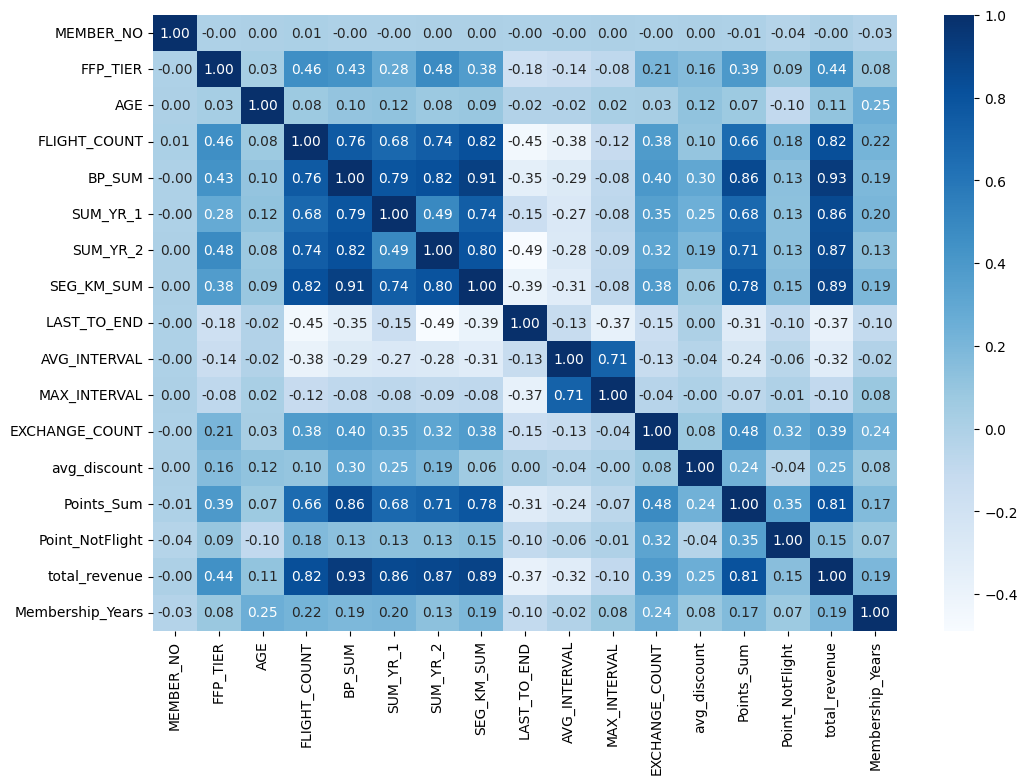

In [154]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

In [219]:
# feats = ['FFP_TIER', 'FLIGHT_COUNT','AGE','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','avg_discount','total_revenue','Membership_Years']
feats = ['FFP_TIER', 'FLIGHT_COUNT','LAST_TO_END','AVG_INTERVAL','avg_discount','total_revenue','Membership_Years']


Memilih 9 Feature  : <br>
1. FFP_TIER – Menggambarkan level membership customer, mencerminkan loyalitas dan nilai customer bagi maskapai.

2. FLIGHT_COUNT – Menunjukkan frekuensi penerbangan, indikator untuk perilaku perjalanan customer.

3. AGE – Usia memengaruhi preferensi dan pola perjalanan customer.

4. LAST_TO_END – Selisih hari dari penerbangan terakhir ke tanggal data terakhir diambil, menunjukkan kapan terkahir customer melakukan perjalanan.

5. AVG_INTERVAL – Rata-rata selang waktu antar penerbangan, mengukur konsistensi perjalanan.

6. MAX_INTERVAL – Selang waktu terpanjang antar penerbangan, membantu mendeteksi pola penerbangan customer.

7. avg_discount – Menunjukkan sensitivitas pelanggan terhadap harga dan promosi.

8. total_revenue – Total pendapatan yang dihasilkan pelanggan, analisis nilai pelanggan.

9. Membership_years – Lama menjadi anggota, mencerminkan loyalitas jangka panjang dan potensi retensi.

## Standardization 

In [222]:
from sklearn.preprocessing import StandardScaler
feats = ['FFP_TIER', 'FLIGHT_COUNT','LAST_TO_END','AVG_INTERVAL','avg_discount','total_revenue','Membership_Years']

X = df_cleaned[feats].copy() 

# Buat objek scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Untuk hasilnya kembali jadi DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().T



,count,mean,std,min,25%,50%,75%,max
FFP_TIER,56837.0,-1.148130e-15,1.000009,-0.242724,-0.242724,-0.242724,-0.242724,5.956189
FLIGHT_COUNT,56837.0,0.000000e+00,1.000009,-0.860037,-0.664857,-0.372086,0.311045,4.214650
LAST_TO_END,56837.0,-3.200361e-17,1.000009,-0.964302,-0.798319,-0.366764,0.501880,2.980557
AVG_INTERVAL,56837.0,-1.080122e-16,1.000009,-1.137084,-0.674815,-0.297248,0.346626,4.471155
avg_discount,56837.0,-4.160470e-16,1.000009,-3.933439,-0.591897,-0.051187,0.477530,4.266665
total_revenue,56837.0,-3.200361e-17,1.000009,-0.853182,-0.607077,-0.337958,0.233854,30.388342
Membership_Years,56837.0,-1.600181e-17,1.000009,-1.094304,-0.816069,-0.290515,0.698764,45.482646


## Modeling

Modeling menggunakan K-Means

In [223]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans_mod= KMeans(n_clusters=4, random_state=42,n_init=50)
labels =kmeans_mod.fit_predict(X_scaled)
df_kmeans = pd.DataFrame(X_scaled, columns=feats)
df_kmeans['Cluster'] = labels
df_kmeans.head()

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,AVG_INTERVAL,avg_discount,total_revenue,Membership_Years,Cluster
0,2.856733,1.189356,-0.433157,-0.617064,2.030057,19.914620,0.904467,2
1,5.956189,3.141158,-0.848114,-0.822923,1.471293,12.940812,-0.069354,2
2,2.856733,1.774897,-0.599140,-0.707835,0.435177,7.624564,1.236209,2
3,5.956189,3.824289,-0.958769,-0.859424,1.106808,11.857125,0.277845,2
4,-0.242724,1.091766,-0.610205,-0.554975,1.675894,9.800267,1.070933,2


In [224]:
#Analisis cluster
print("Jumlah anggota tiap cluster:")
df_kmeans['Cluster'].value_counts()

Jumlah anggota tiap cluster:


Cluster
0    25530
3    14769
1    13146
2     3392
Name: count, dtype: int64

Untuk melihat cluster yang telah dibuat datanya kita reduksi dulu dimensinya dengan PCA agar mudah untuk melihat pembagian clusternya

In [225]:
from sklearn.decomposition import PCA

# --- PCA untuk visualisasi ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_plot['Cluster'] = labels
df_pca_plot.head()

,PC1,PC2,Cluster
0,13.641256,-1.096754,2
1,11.948309,-1.066508,2
2,6.981301,-0.289877,2
3,11.758128,-0.813263,2
4,6.805209,-0.303614,2


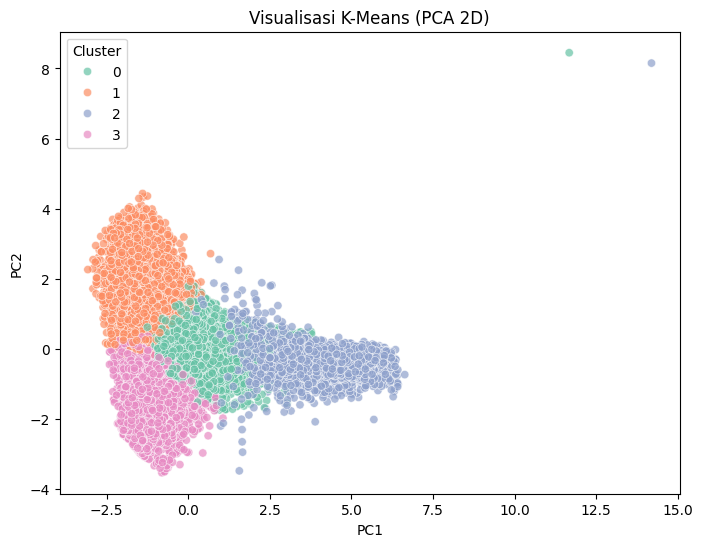

In [160]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca_plot,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title('Visualisasi K-Means (PCA 2D)')
plt.show()

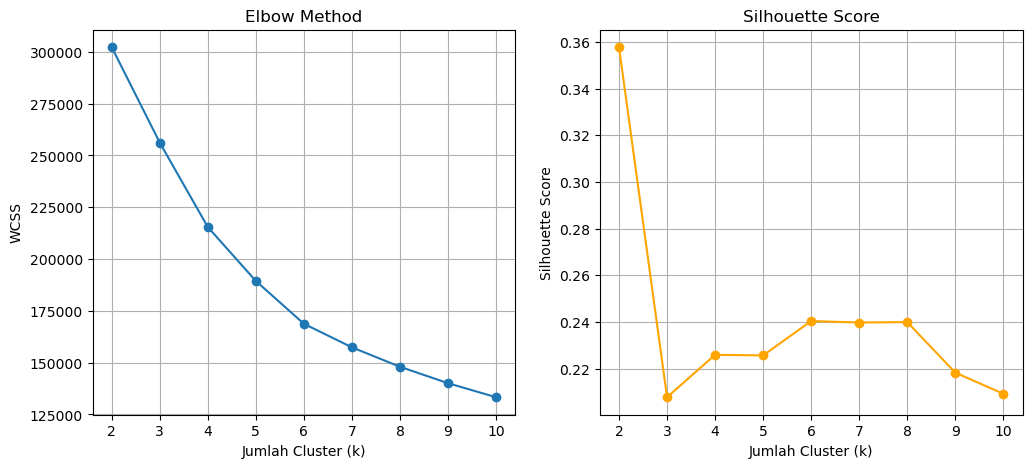

In [226]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)

# Untuk menyimpan hasil
wcss = []  # inertia_
silhouette_avg = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Simpan WCSS
    wcss.append(kmeans.inertia_)
    
    # Hitung silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


In [162]:
df_evaluasi = pd.DataFrame({
    'k': list(range_n_clusters),
    'WCSS': wcss,
    'Silhouette Score': silhouette_avg
})

df_evaluasi

,k,WCSS,Silhouette Score
0,2,263206.877826,0.542443
1,3,214318.632325,0.244147
2,4,175094.864659,0.256890
3,5,149843.831698,0.247840
4,6,132950.023965,0.257557
5,7,120374.840331,0.258311
6,8,112538.435701,0.238560
7,9,106288.042258,0.225654
8,10,101036.681940,0.222518


Dari elbow method menunjukan cluseter optimal antara 3 dan 4 cluster dan dari shilhouette score adalah 3 cluster. 

K-Means Dengan 3 cluster

In [163]:
kmeans_3c = KMeans(n_clusters=3, random_state=42 ,n_init=20)
labels_3c = kmeans_3c.fit_predict(X_scaled)
df_kmeans_3c = pd.DataFrame(X_scaled, columns=feats)
df_kmeans_3c['Cluster'] = labels_3c
print("Jumlah anggota 3 cluster:")
df_kmeans_3c['Cluster'].value_counts()

Jumlah anggota 3 cluster:


Cluster
1    38820
0    14471
2     2639
Name: count, dtype: int64

In [164]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca_plot_3c = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_plot_3c['Cluster'] = labels_3c
df_pca_plot_3c.head()

,PC1,PC2,Cluster
0,4.010464,-0.781209,2
1,4.260300,-0.363447,2
2,1.643955,-0.159419,1
3,1.518771,-0.439095,1
4,2.272606,0.074365,1


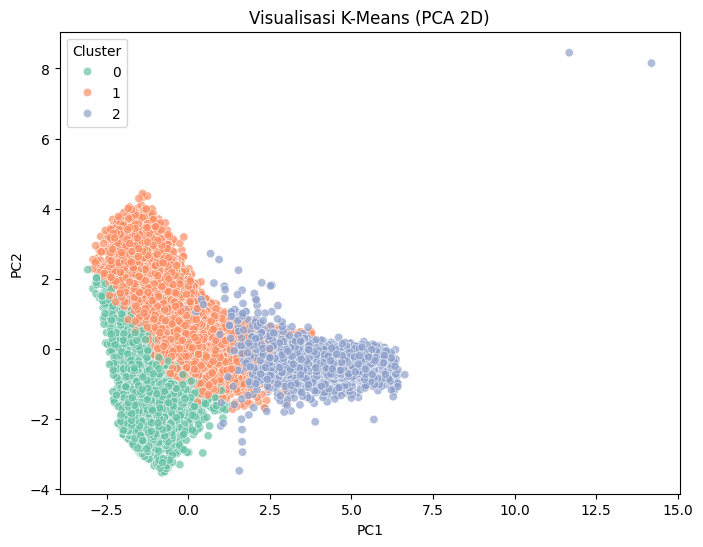

In [165]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca_plot_3c,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title('Visualisasi K-Means (PCA 2D)')
plt.show()

In [166]:
df_cleaned['Cluster'] = labels_3c

In [167]:
df_cleaned.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,total_revenue,Membership_Years,Cluster
3,21189,8/22/2008,2008-08-23,Male,5,Los Angeles,US,64.0,2014-03-31,23,...,97,27.863636,73,11,1.090870,372204,12,241850.0,5.605479,2
12,28012,11/23/2006,2007-11-18,Male,5,SAN MARINO,US,58.0,2014-03-31,29,...,67,23.000000,112,3,0.799127,245808,4,98727.0,6.369863,2
15,1254,3/28/2008,2008-04-05,Male,4,BOWLAND HEIGHTS,US,63.0,2014-03-31,22,...,65,31.190476,102,6,1.026085,310002,8,124064.0,5.989041,1
35,3539,10/13/2009,2009-10-13,Male,4,UPLAND,US,53.0,2014-03-31,25,...,108,23.416667,72,9,0.937900,258717,10,164198.0,4.465753,1
36,56149,2/13/2005,2005-03-06,Male,4,fanyu,CN,39.0,2014-03-31,24,...,34,27.826087,192,6,1.087220,239108,10,171345.0,9.073973,1


In [168]:
df_cleaned['Cluster'].value_counts()

Cluster
1    38820
0    14471
2     2639
Name: count, dtype: int64

In [169]:
df_cleaned['Cluster'].describe().T

count    55930.000000
mean         0.788450
std          0.511047
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Cluster, dtype: float64

In [170]:
feats = ['FFP_TIER', 'FLIGHT_COUNT','AGE','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','avg_discount','total_revenue','Membership_Years','Cluster']
df_cleaned[feats].groupby('Cluster').agg(['mean'])

,FFP_TIER,FLIGHT_COUNT,AGE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,total_revenue,Membership_Years
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,
0,4.000000,4.270956,41.462097,437.323060,41.004470,81.587865,0.710015,3984.876097,2.902196
1,4.000000,11.561695,42.369423,89.878465,71.237336,197.486167,0.708327,10189.880036,3.671674
2,4.999242,31.136794,43.670330,32.108374,27.083658,119.957939,0.842648,30458.428192,4.462461


### Interpretasi cluster pelanggan

- Kategori pelanggaan VIP : cluster 2
- Kategori pelanggan Loyal : cluster 0
- Kategori pelanggan standart : cluster 1  

1. Rekomendasi untuk Segmen VIP
(Pelanggan Paling Berharga, Frekuensi Tinggi)

Fokus utama untuk segmen ini adalah retensi dan peningkatan nilai pelanggan (customer lifetime value). Mereka adalah sumber pendapatan terbesar, jadi penting untuk membuat mereka merasa dihargai dan memastikan mereka tidak beralih ke maskapai lain.

Program Loyalitas Eksklusif: Tawarkan manfaat yang tidak dapat diakses oleh segmen lain, seperti prioritas boarding, akses lounge VIP, jatah bagasi ekstra, atau layanan pelanggan khusus.

Komunikasi Personalisasi: Kirimkan penawaran yang sangat personal, misalnya diskon untuk rute yang sering mereka gunakan atau rekomendasi destinasi baru yang sesuai dengan pola perjalanan mereka.

Pengenalan Produk Baru: Berikan akses lebih awal atau undangan eksklusif untuk mencoba layanan baru (misalnya, kursi kelas bisnis terbaru atau menu premium).

Program Hadiah Berbasis Pengeluaran: Selain poin dari penerbangan, berikan bonus poin atau hadiah khusus saat pengeluaran mereka mencapai ambang batas tertentu.

2. Rekomendasi untuk Segmen Loyal
(Pelanggan Reguler, Kontribusi Signifikan)

Tujuan utama di sini adalah mempertahankan loyalitas mereka dan mendorong mereka untuk meningkatkan frekuensi terbang, agar berpotensi naik ke segmen VIP.

Promosi Berbasis Milestone: Buat program insentif yang jelas, misalnya "Terbang 5 kali lagi dan dapatkan diskon 20% untuk penerbangan berikutnya," atau "Dengan 3 penerbangan lagi, Anda akan naik ke status VIP."

Penawaran Paket Keluarga: Karena segmen ini seringkali terbang secara teratur, tawarkan paket atau diskon khusus untuk perjalanan keluarga.

Survei dan Masukan: Lakukan survei untuk mengumpulkan masukan dari mereka. Ini tidak hanya membantu meningkatkan layanan, tetapi juga membuat mereka merasa dilibatkan dan dihargai.

Komunikasi Berfokus Nilai: Fokuskan komunikasi pada manfaat yang mereka dapatkan dari menjadi anggota loyal, seperti akses ke penawaran khusus dan kemudahan perjalanan.

3. Rekomendasi untuk Segmen Standar
(Pelanggan Frekuensi Rendah, Berisiko Churn)

Strategi untuk segmen ini adalah mendorong mereka untuk terbang lebih sering dan mencegah mereka berhenti menggunakan layanan maskapai.

Kampanye Re-engagement: Untuk pelanggan yang sudah lama tidak terbang, kirimkan email atau notifikasi dengan penawaran "Selamat Datang Kembali" atau diskon spesial untuk perjalanan berikutnya.

Penawaran Diskon Awal: Berikan insentif yang kuat untuk penerbangan kedua atau ketiga mereka, misalnya "Dapatkan diskon 15% untuk penerbangan Anda berikutnya setelah penerbangan pertama."

Informasi Manfaat Keanggotaan: Edukasi mereka tentang manfaat menjadi anggota loyal dan bagaimana mereka bisa dengan mudah mencapai tingkat berikutnya (misalnya, "Setiap penerbangan membawa Anda lebih dekat ke status Loyal").

Iklan Bertarget: Gunakan data demografi dan pola perjalanan yang minimal untuk menargetkan iklan di media sosial atau platform lain dengan promosi yang relevan.